<a href="https://colab.research.google.com/github/pingjcole/Data110-2025Fall/blob/main/Ping_Project_1_NHL_Goalie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1

Top four teams/goalies 2024

1.  Edmonton Oilers (Stuart Skinner) vs. Dallas Starsm(Jake Oettinger) in the Western Conference.
2.  Florida Panthers (Sergei Bobrovsky ) vs. New York Rangers (Igor Shesterkin) in the Eastern Conference
3.  Oilers vs Panthers final

        *   Sergei Bobrovsky (FLA)
        *   Igor Shestyorkin (NYR)
        *   Stuart Skinner (EDM)
        *   Jake Oettinger (DAL)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pingjcole/Data110-2025Fall/refs/heads/main/NHL_Goalies%2024_25.csv')
goalies = ["Sergei Bobrovsky", "Igor Shesterkin", "Stuart Skinner", "Jake Oettinger"]
df = df[
    (df["name"] == "Sergei Bobrovsky") |
    (df["name"] == "Igor Shesterkin") |
    (df["name"] == "Stuart Skinner") |
    (df["name"] == "Jake Oettinger")
]


In [3]:
print(df.describe())

           playerId  season  games_played        icetime      xGoals  \
count  2.000000e+01    20.0     20.000000      20.000000   20.000000   
mean   8.478421e+06  2024.0     56.000000   78345.800000   61.916000   
std    1.811647e+03     0.0      3.906809   85202.038015   62.877349   
min    8.475683e+06  2024.0     51.000000    3995.000000    1.540000   
25%    8.477457e+06  2024.0     53.250000   11561.250000   11.010000   
50%    8.479010e+06  2024.0     56.000000   16063.500000   28.195000   
75%    8.479974e+06  2024.0     58.750000  169130.750000  121.530000   
max    8.479979e+06  2024.0     61.000000  210308.000000  188.560000   

            goals  unblocked_shot_attempts  xRebounds    rebounds     xFreeze  \
count   20.000000                20.000000   20.00000   20.000000   20.000000   
mean    58.000000              1234.650000   43.88050   66.650000  162.841000   
std     58.987064              1340.898884   45.83392   70.933086  179.204912   
min      2.000000          

In [4]:
# View column names
print(df.columns)


Index(['playerId', 'season', 'name', 'team', 'position', 'situation',
       'games_played', 'icetime', 'xGoals', 'goals', 'unblocked_shot_attempts',
       'xRebounds', 'rebounds', 'xFreeze', 'freeze', 'xOnGoal', 'ongoal',
       'xPlayStopped', 'playStopped', 'xPlayContinuedInZone',
       'playContinuedInZone', 'xPlayContinuedOutsideZone',
       'playContinuedOutsideZone', 'flurryAdjustedxGoals', 'lowDangerShots',
       'mediumDangerShots', 'highDangerShots', 'lowDangerxGoals',
       'mediumDangerxGoals', 'highDangerxGoals', 'lowDangerGoals',
       'mediumDangerGoals', 'highDangerGoals', 'blocked_shot_attempts',
       'penalityMinutes', 'penalties'],
      dtype='object')


In [5]:
print(df[["name", "situation", "xGoals", "goals"]].head())

              name situation  xGoals  goals
0  Igor Shesterkin     other   14.02   13.0
1  Igor Shesterkin       all  188.56  167.0
2  Igor Shesterkin      5on5  133.92  118.0
3  Igor Shesterkin      4on5   36.41   31.0
4  Igor Shesterkin      5on4    4.16    5.0


Combined Bar Graph: Low + Medium + High Danger Shots and show total dangerous shots the goalies faced.

This tells which goalie faced the toughest overall shot volume across situations.

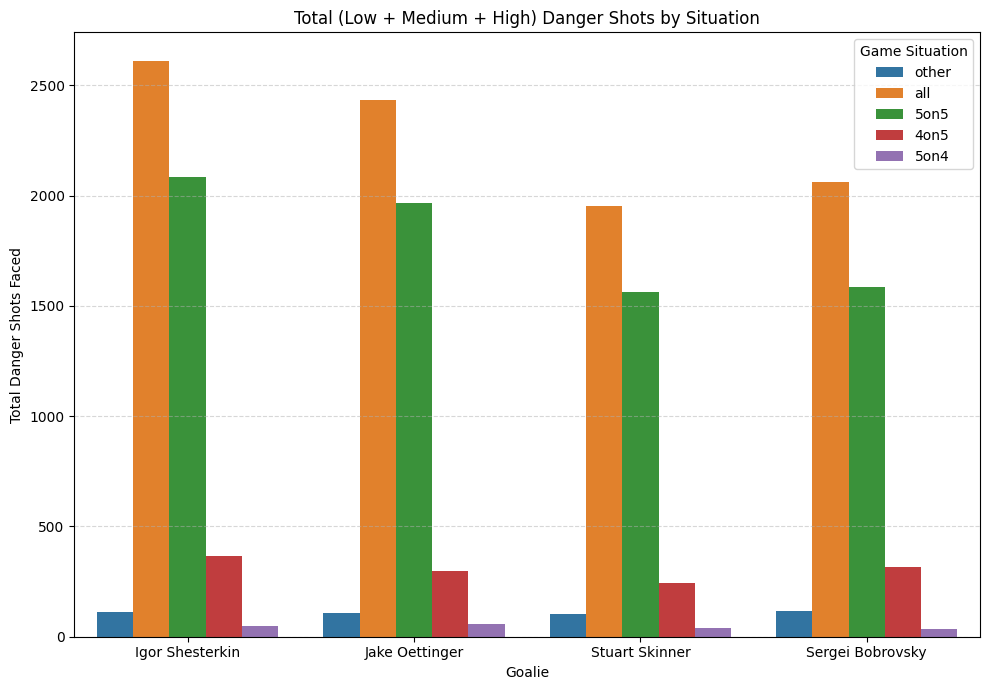

In [7]:
# Compare shots faced
df["total_danger_shots"] = df["lowDangerShots"] + df["mediumDangerShots"] + df["highDangerShots"]

plt.figure(figsize=(10,7))
sns.barplot(data=df, x="name", y="total_danger_shots", hue="situation")

plt.title("Total (Low + Medium + High) Danger Shots by Situation")
plt.xlabel("Goalie")
plt.ylabel("Total Danger Shots Faced")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Game Situation")
plt.tight_layout()
plt.show()


What the charts reveal

Each chart shows visually each goalie's performance in each game situation, and which goalie did best.

It also shows whether the goalie consistently performs above expected (positive GSAx) or below expected (negative GSAx). The higher the GSAx, the stronger of aperformance.

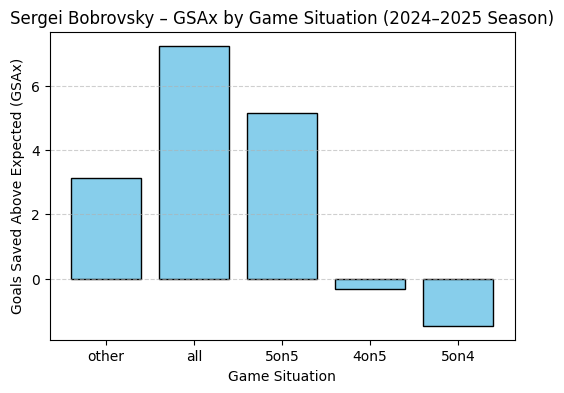

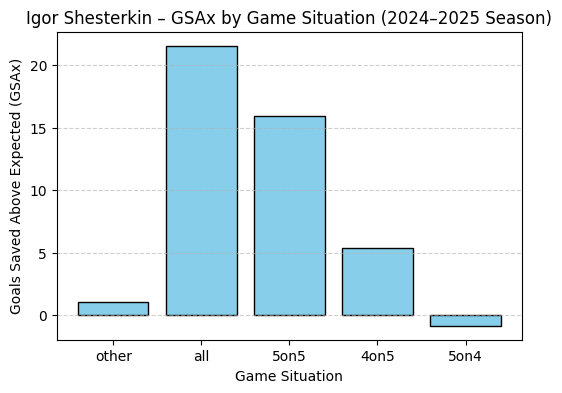

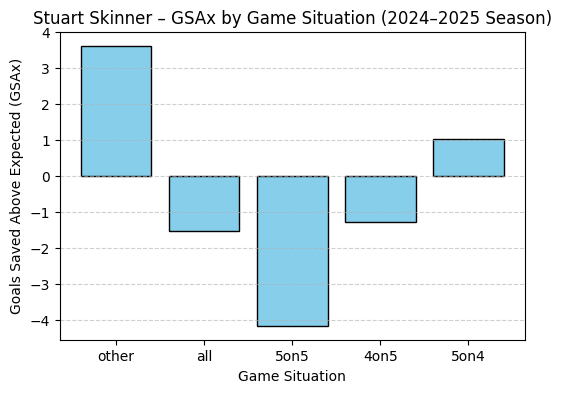

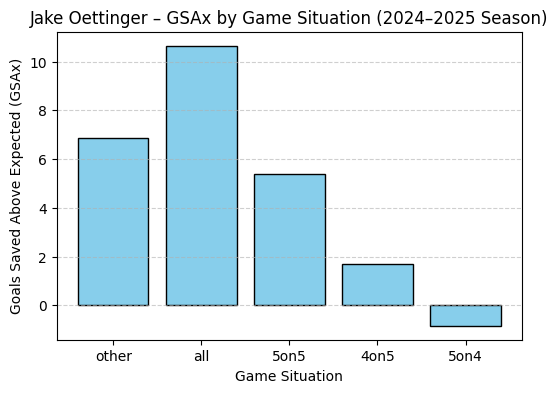

In [6]:
df["GSAx"] = df["xGoals"] - df["goals"]

# Semifinal goalies:
goalies = ["Sergei Bobrovsky", "Igor Shesterkin", "Stuart Skinner", "Jake Oettinger"]

for goalie in goalies:
    goalie_data = df[df["name"] == goalie]

    plt.figure(figsize=(6, 4))
    plt.bar(goalie_data["situation"], goalie_data["GSAx"], color="skyblue", edgecolor="black")

    plt.title(f"{goalie} – GSAx by Game Situation (2024–2025 Season)")
    plt.xlabel("Game Situation")
    plt.ylabel("Goals Saved Above Expected (GSAx)")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

Play Style (Freezes vs Rebounds)

* Conservative = more freezes

* Aggressive = more rebounds

A high freeze rate means the goalie plays more conservatively (slowing the game down).

More rebounds suggest an aggressive style. By allowing rebounds, the goalie keeps the play moving but risks second-chance goals.

Conservative goalies control the puck more, and aggressive goalies take more risks.

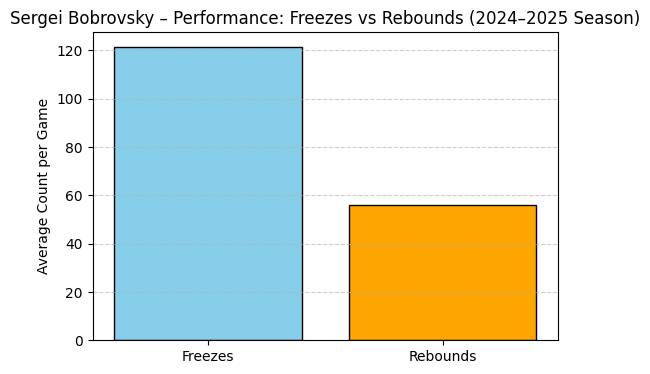

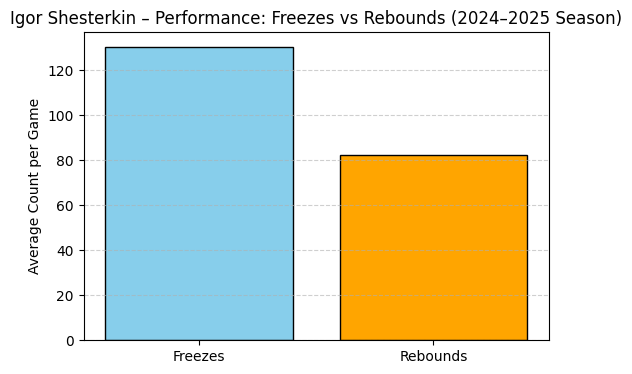

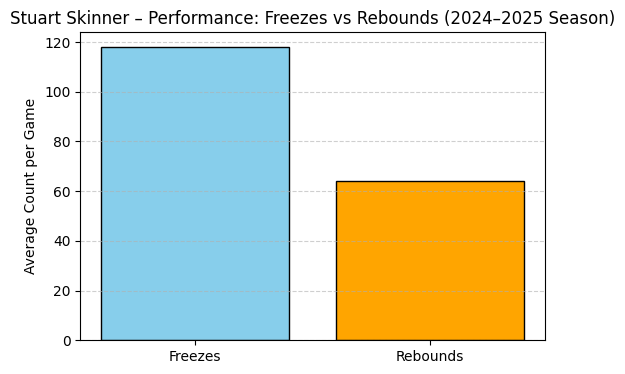

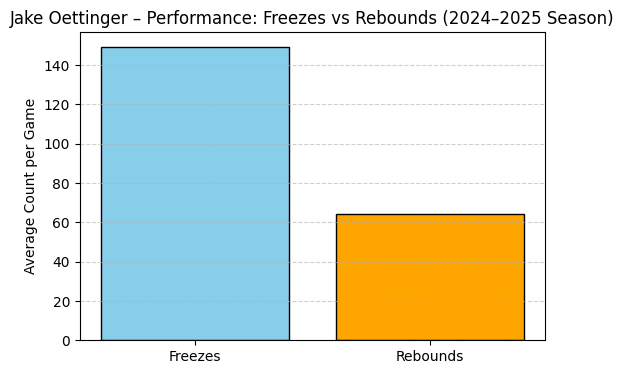

In [8]:
# Compare Style (Freezes vs Rebounds)
for goalie in goalies:
    goalie_data = df[df["name"] == goalie]
    goalies = ["Sergei Bobrovsky", "Igor Shesterkin", "Stuart Skinner", "Jake Oettinger"]

    avg_freezes = goalie_data["freeze"].mean()
    avg_rebounds = goalie_data["rebounds"].mean()

    plt.figure(figsize=(6, 4))
    plt.bar(["Freezes", "Rebounds"], [avg_freezes, avg_rebounds],
            color=["skyblue", "orange"], edgecolor="black")

    plt.title(f"{goalie} – Performance: Freezes vs Rebounds (2024–2025 Season)")
    plt.ylabel("Average Count per Game")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()


Interpretation:

* This histogram shows how often each of the goalies played certain amounts of ice time during the season.

* Each color represents a different goalie, and the bars show how frequently their game ice times fell into specific ranges.

* Taller bars mean the goalie often played around that many minutes.

* A narrow shape means the goalie’s ice time was consistent game to game.

* A wider spread means more variation—some shorter and some longer appearances.

* This visualization helps compare how consistently each goalie was used throughout the season and reveals which goalies carried heavier workloads.


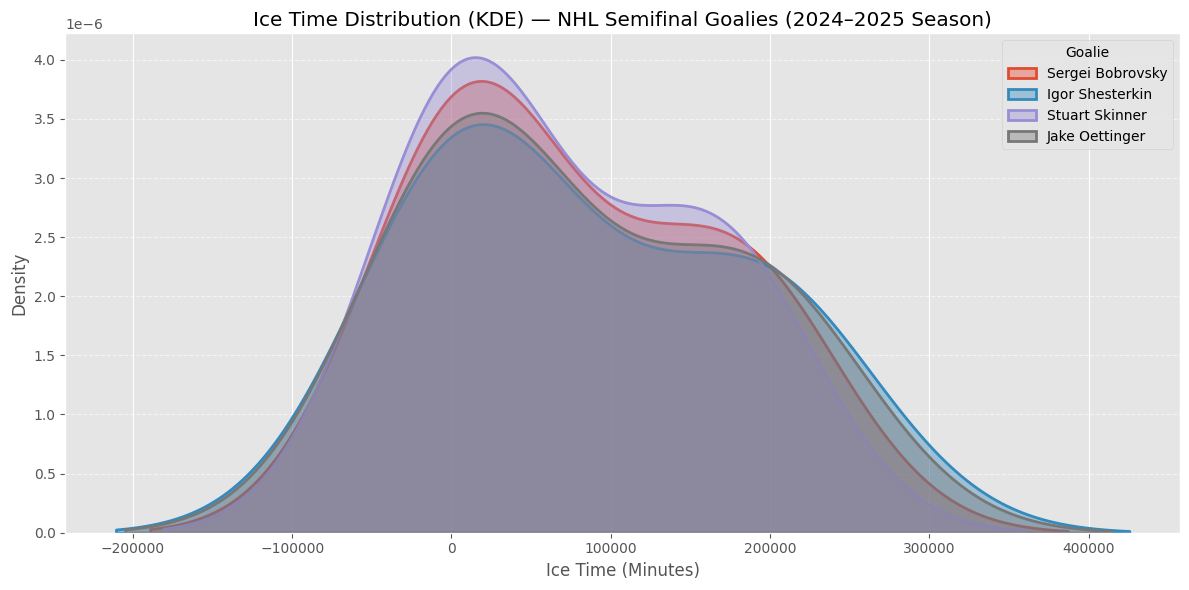

In [9]:

goalies = ["Sergei Bobrovsky", "Igor Shesterkin", "Stuart Skinner", "Jake Oettinger"]
df = df[df["name"].isin(goalies)]

# Style and figure
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))

# KDE plot for each goalie
for goalie in goalies:
    gl = df[df["name"] == goalie]
    sns.kdeplot(gl["icetime"], fill=True, alpha=0.4, linewidth=2, label=goalie)

# Titles and labels
plt.title("Ice Time Distribution (KDE) — NHL Semifinal Goalies (2024–2025 Season)")
plt.xlabel("Ice Time (Minutes)")
plt.ylabel("Density")
plt.legend(title="Goalie")
plt.grid(axis="y", linestyle="--", alpha=0.6)
#plt.xlim(left=0)
plt.tight_layout()
plt.show()

Visualize Relationships: Pairplot

Interpretation:

* This pairplot shows how these goalie performance metrics relate to each other.  Each point represents a data entry for one of the four semifinal goalies, the colors separate the goalies, and each small scatterplot shows how two statistics interact.

* Diagonal plots show the distribution (KDE curves) of each variable. For example, a narrow peak means that a goalie’s performance in that category is consistent across games.

* Each scatterplot compares two metrics, helping to show whether they move together in a positive relationship, move in opposite directions in negative relationship, or have no clear connection.

Key Findings:

* Goals vs. xGoals (Expected Goals)

   ** There is usually a positive relationship because goalies who face higher xGoals tend to allow more actual goals.

   ** Goalies like Shesterkin and Bobrovsky appear to stay slightly below the trend line, meaning they often outperform expectations (saving more than predicted).

* Goals vs. Rebounds

  ** There is a weak positive trend between the rebounds increasing and goals allowed rising.

  ** This shows that giving up more rebounds lead to second-chance goals.

  ** Skinner has higher rebound numbers and a more aggressive play style.

* Freeze vs. Rebounds

  ** Bobrovsky is in the high-freeze, low-rebound area as a controlled, conservative goalie, while Skinner is on the opposite end of lower freezes, more rebounds.

* xGoals vs. Freeze or Rebounds

  ** These relationships show how shot quality affects goalies behavior.

  ** Some goalies increase freezes when facing tougher situations, while others rely more on reaction saves, leading to rebounds.

Overall Takeaway:

* The pairplot helps summarize the balance between goalie efficiency, workload, and style.

* Bobrovsky and Shesterkin show consistent, well-controlled performances — low rebounds, stable saves, and few outlier games.

* Skinner shows higher variation, more rebounds, and higher goals allowed in some games, he is an aggressive golies who takes more risks.

* Oettinger falls in the middle, steady and reliable under average workloads.

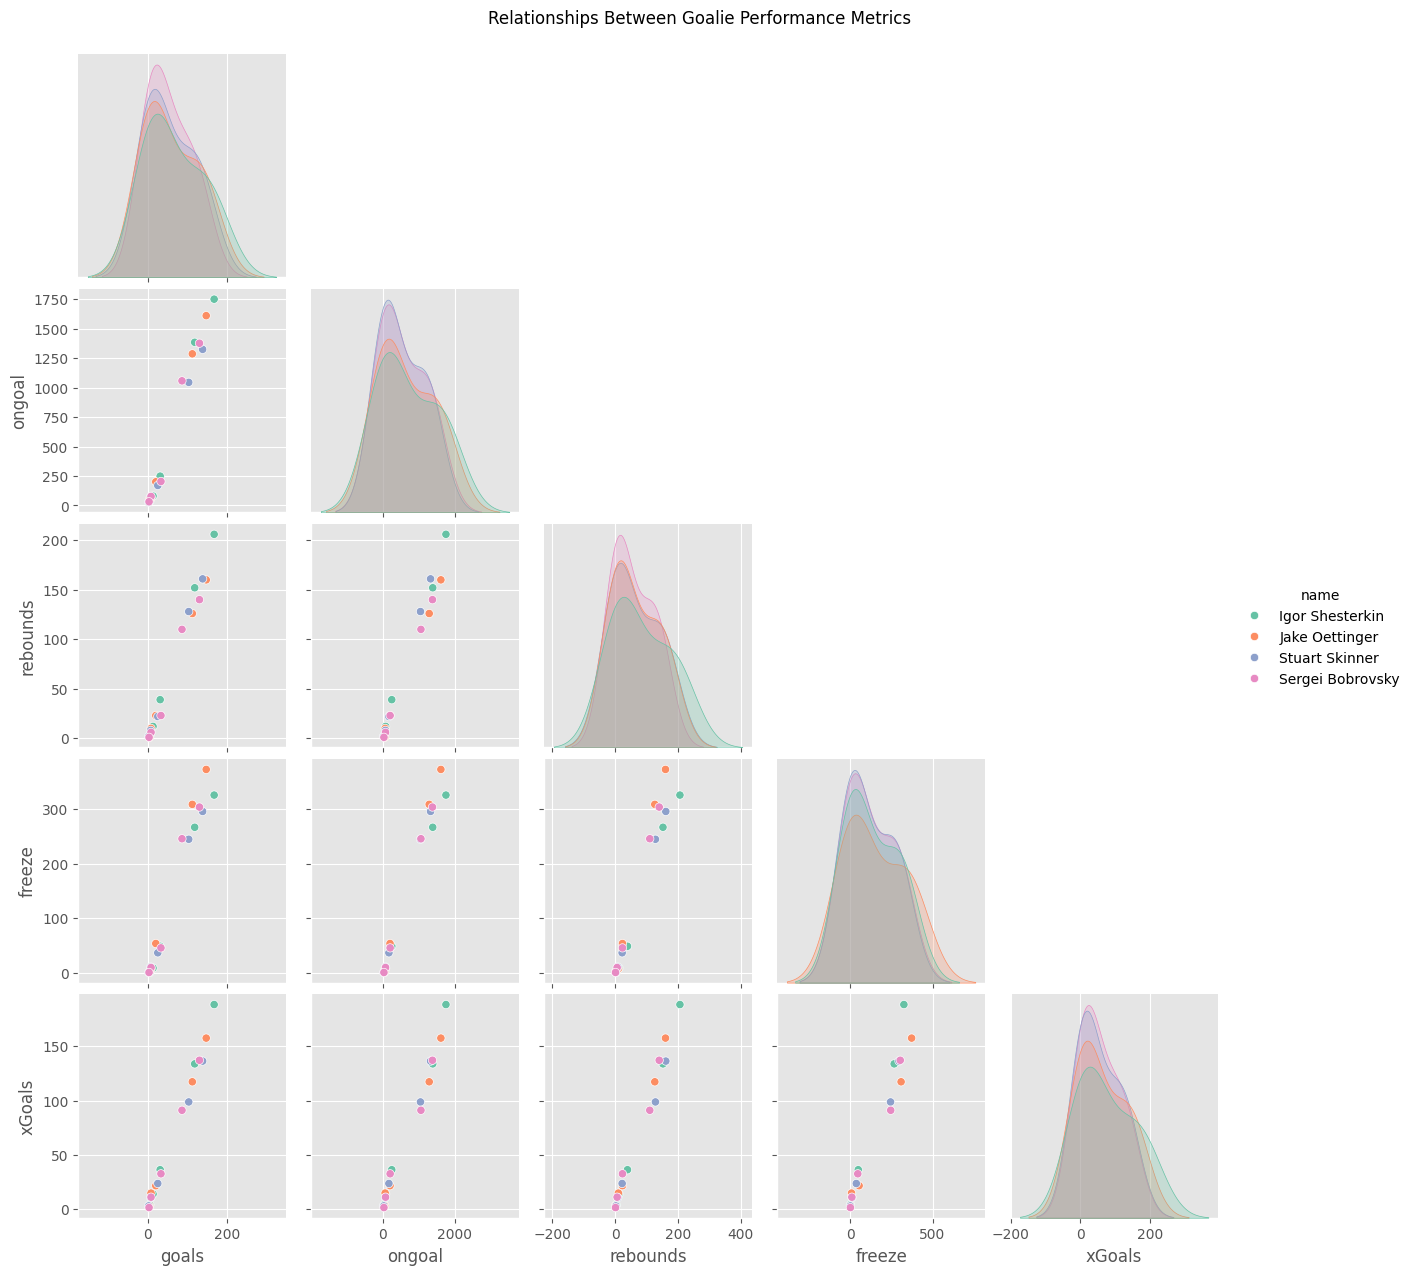

In [12]:
selected_cols = ["goals", "ongoal", "rebounds", "freeze", "xGoals"]

df_small = df[["name"] + selected_cols]

sns.pairplot(data=df_small, hue="name", palette="Set2", diag_kind="kde", corner=True )

plt.suptitle("Relationships Between Goalie Performance Metrics", y=1.02)
plt.show()


______
______
